# Data description

The dataset we are using for analysis:
* Segmenting and Clustering Neighborhoods in New York City :https://codekarim.com/node/57
* NYPD Arrest Data: https://www.kaggle.com/datasets/thaddeussegura/nypd-arrest-data-20062019
* NYC Airbnb Data: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data
* NYC property Sales: https://www.kaggle.com/datasets/johnshuford/new-york-city-property-sales
* NYC motor vehicle collision: https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95

## Data preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager as fm
from  matplotlib import cm
import json
import os
import requests
from pandas.io.json import json_normalize
import glob
from scipy.stats import shapiro
import scipy

In [2]:
crimeData = pd.read_csv("Data/NYPD_Arrests_Data__Historic_.csv").dropna()
collisionData = pd.read_csv("Data/Motor_Vehicle_Collisions_-_Crashes.csv")
airbnbData = pd.read_csv("Data/AB_NYC_2019.csv").dropna()

C:\Users\amper\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3340: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### variables in the crime data

In [3]:
print (crimeData.dtypes)

ARREST_KEY             int64
ARREST_DATE           object
PD_CD                float64
PD_DESC               object
KY_CD                float64
OFNS_DESC             object
LAW_CODE              object
LAW_CAT_CD            object
ARREST_BORO           object
ARREST_PRECINCT        int64
JURISDICTION_CODE    float64
AGE_GROUP             object
PERP_SEX              object
PERP_RACE             object
X_COORD_CD           float64
Y_COORD_CD           float64
Latitude             float64
Longitude            float64
Lon_Lat               object
dtype: object


### variables in the collision data

In [4]:
print (collisionData.dtypes)

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

### variables in the airbnb data

In [5]:
print (airbnbData.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


## Show crime distribution from NYPD in pie chart

In [6]:
def plotPieChart(data,label,title):
    fig, axes = plt.subplots(figsize=(15,15),ncols=2)
    ax1, ax2 = axes.ravel()

    colors = cm.rainbow(np.arange(len(data))/len(data))# colormaps: Paired, autumn, rainbow, gray,spring,Darks
    patches, texts, autotexts = ax1.pie(data, labels=labels, autopct='%1.0f%%',
        shadow=False, startangle=170, colors=colors)

    ax1.axis('equal')  
    
    proptease = fm.FontProperties()
    proptease.set_size('xx-small')
    # font size include: ‘xx-small’,x-small’,'small’,'medium’,‘large’,‘x-large’,‘xx-large’ or number, e.g. '12'
    plt.setp(autotexts, fontproperties=proptease)
    plt.setp(texts, fontproperties=proptease)

    ax1.set_title(title, loc='center')
    ax2.axis('off')
    ax2.legend(patches, labels, loc='center left')

    plt.tight_layout()
    plt.savefig('Demo_project_set_legend_good.jpg')
    plt.show()

In [7]:
crimeData.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
3,189714430,11/07/2018,117.0,RECKLESS ENDANGERMENT 1,126.0,MISCELLANEOUS PENAL LAW,PL 1202500,F,M,26,0.0,45-64,M,WHITE,993685.0,233346.0,40.807160,-73.965920,POINT (-73.96591978699998 40.80715993100006)
5,190017529,11/15/2018,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,47,0.0,45-64,M,BLACK,1026486.0,262591.0,40.887333,-73.847250,POINT (-73.84725001299995 40.88733281800006)
10,189678705,11/07/2018,175.0,"SEXUAL ABUSE 3,2",233.0,SEX CRIMES,PL 13052A1,M,B,52,0.0,25-44,M,BLACK,1017542.0,255919.0,40.869059,-73.879630,POINT (-73.87963014799993 40.86905853200005)
14,189068425,10/22/2018,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,94,0.0,45-64,M,BLACK,995886.0,200705.0,40.717566,-73.958026,POINT (-73.95802570099994 40.71756616100004)
15,65864442,09/17/2009,164.0,SODOMY 3,116.0,SEX CRIMES,PL 1304002,F,S,122,0.0,25-44,M,BLACK HISPANIC,954943.0,148360.0,40.573850,-74.105496,POINT (-74.10549615599997 40.573849649000074)


Let's take a look a the distrubation of crime type and where they happend

In [8]:
typeCount = crimeData['OFNS_DESC']
typeCount = typeCount.value_counts(sort=True)
labels =typeCount.index
number = np.array(typeCount)

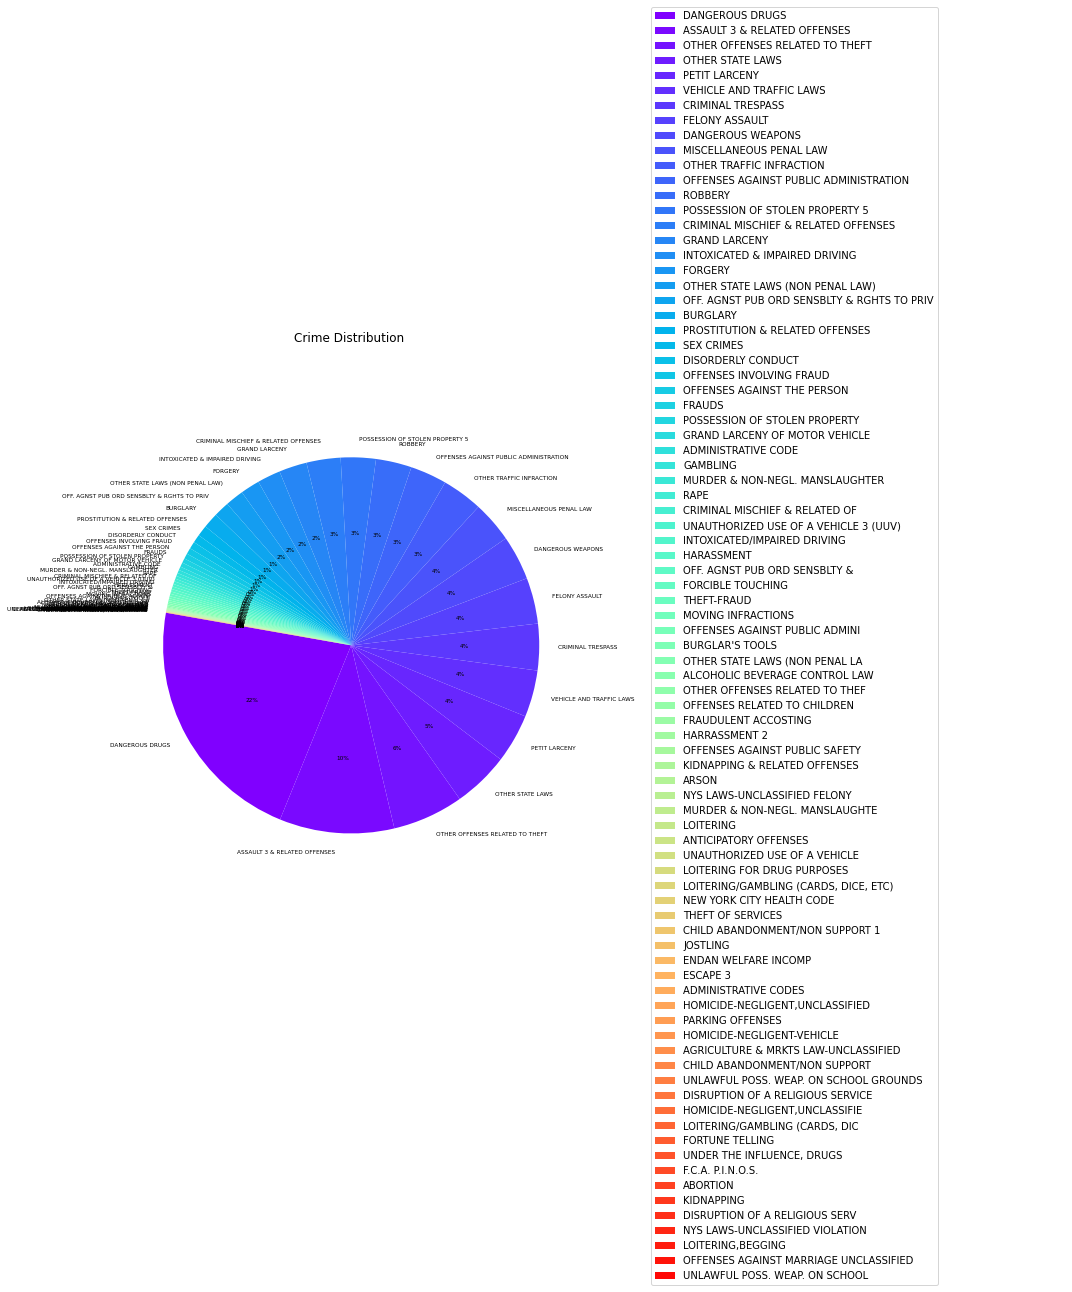

In [9]:
plotPieChart(number,labels, "Crime Distribution")

Then, let's take a look a how these arrests distribute amoung boroughs.

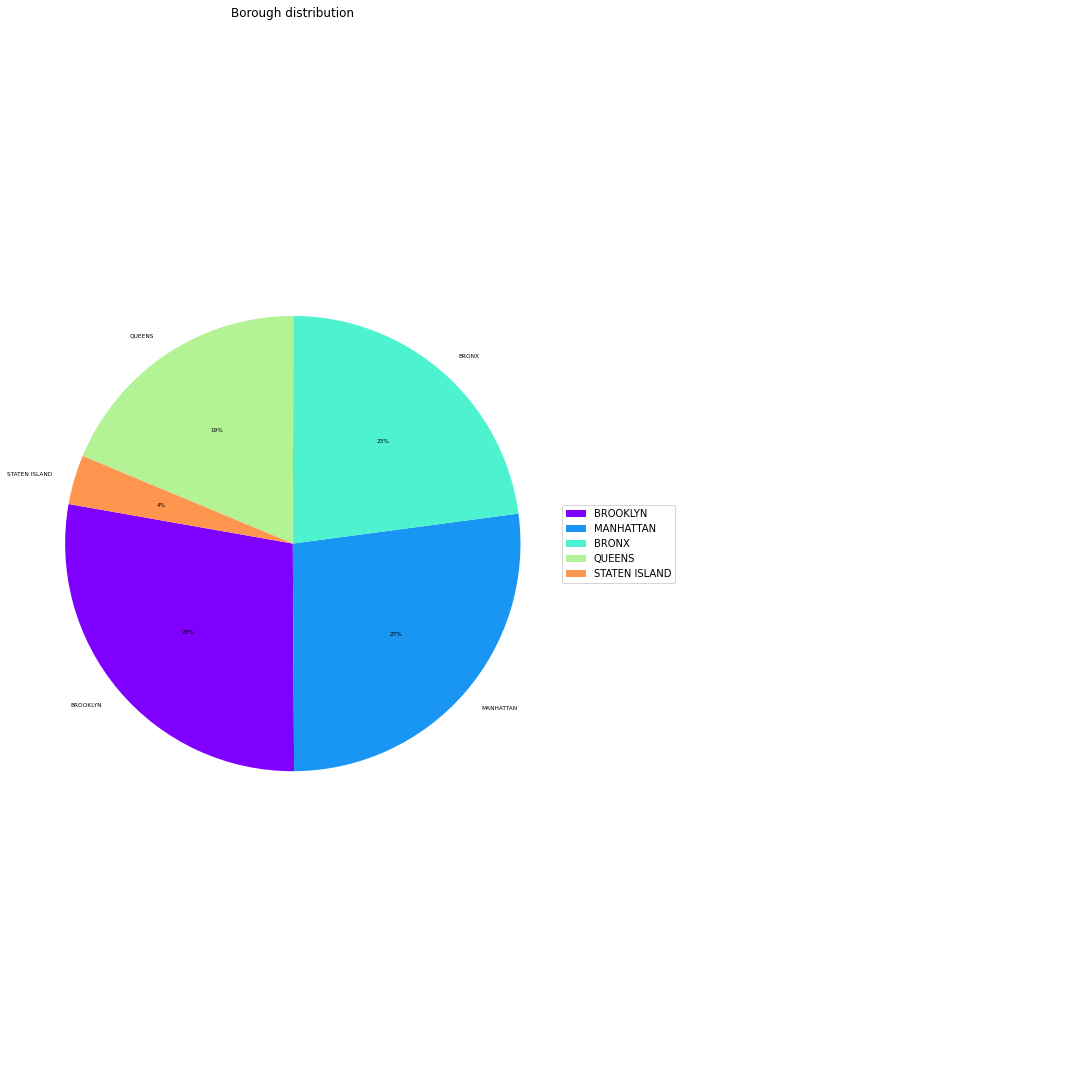

In [10]:
typeBorough = crimeData['ARREST_BORO']
typeBorough = typeBorough.replace(['K','Q','M','B','S'], ['BROOKLYN', 'QUEENS', 'MANHATTAN', 'BRONX', 'STATEN ISLAND'])
typeCountB = typeBorough.value_counts()
labels = typeCountB.index
numberB = np.array(typeCountB)
plotPieChart(typeCountB,labels,"Borough distribution")

Based on previous pie chart, we select severl crime that happens alot and might affect house rent and sale prices.
There Assault, theft, and trespassing. We check these types of crime separatly in different borough.

In [11]:
crimeGivenBorough = crimeData[['OFNS_DESC','ARREST_BORO']]

In [12]:
assult = crimeGivenBorough.loc[crimeGivenBorough['OFNS_DESC']=='ASSAULT 3 & RELATED OFFENSES']
theft = crimeGivenBorough.loc[crimeGivenBorough['OFNS_DESC']=='OTHER OFFENSES RELATED TO THEFT']
threspassing = crimeGivenBorough.loc[crimeGivenBorough['OFNS_DESC']=='CRIMINAL TRESPASS']

Lets plot them out

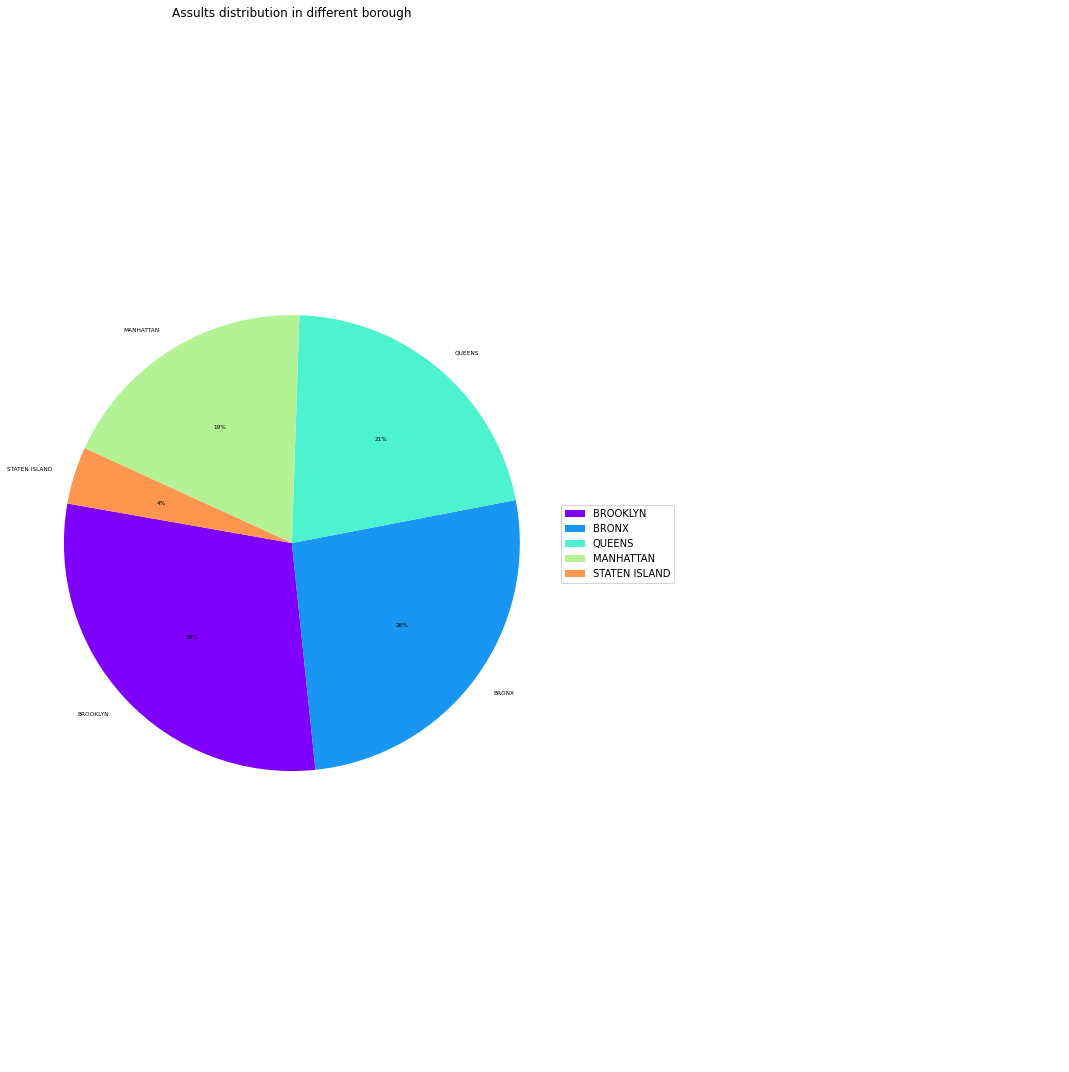

In [13]:
data = assult['ARREST_BORO']
data = data.replace(['K','Q','M','B','S'], ['BROOKLYN', 'QUEENS', 'MANHATTAN', 'BRONX', 'STATEN ISLAND'])
data = data.value_counts()
labels = data.index
plotPieChart(data,labels,"Assults distribution in different borough")

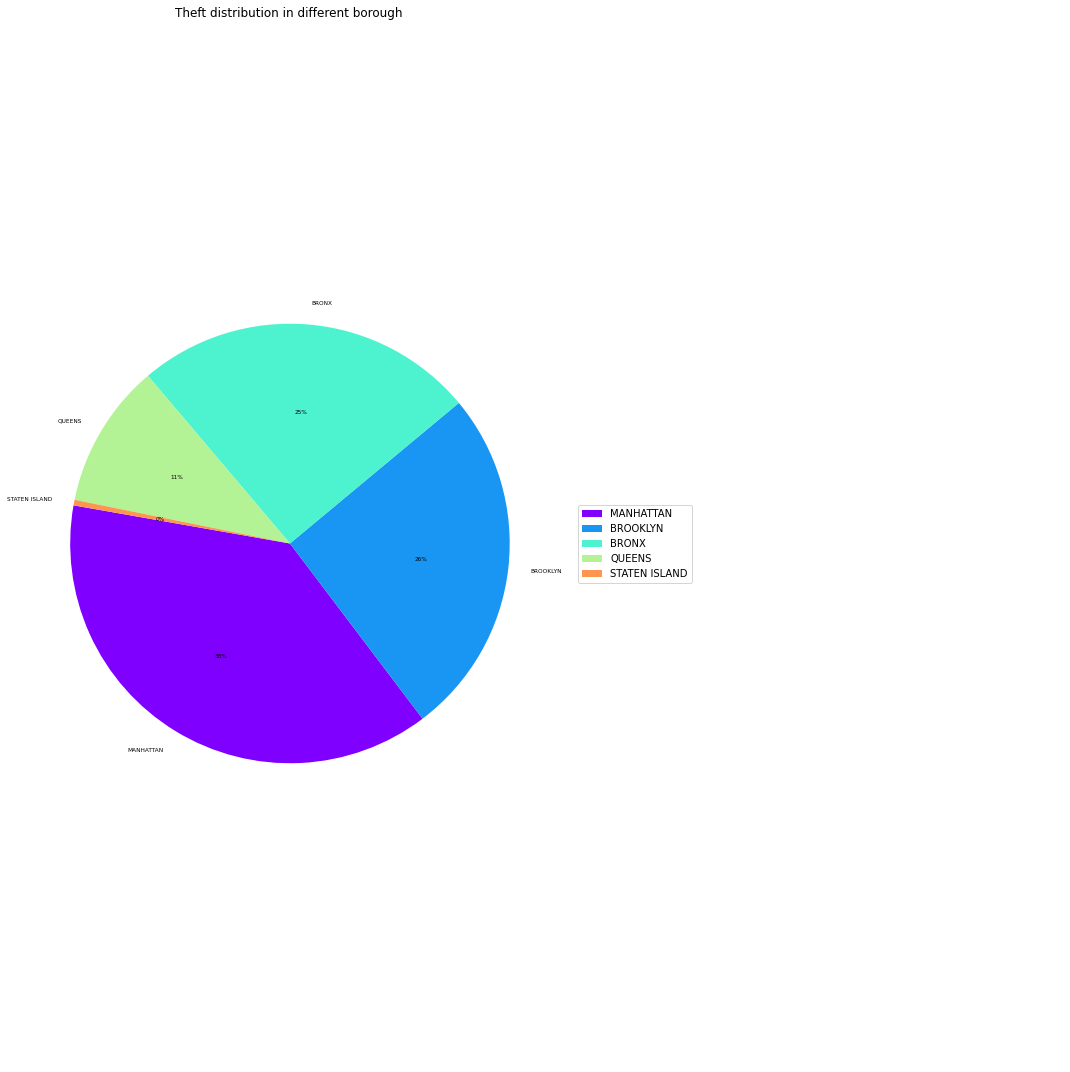

In [14]:
data = theft['ARREST_BORO']
data = data.replace(['K','Q','M','B','S'], ['BROOKLYN', 'QUEENS', 'MANHATTAN', 'BRONX', 'STATEN ISLAND'])
data = data.value_counts()
labels = data.index
plotPieChart(data,labels,"Theft distribution in different borough")

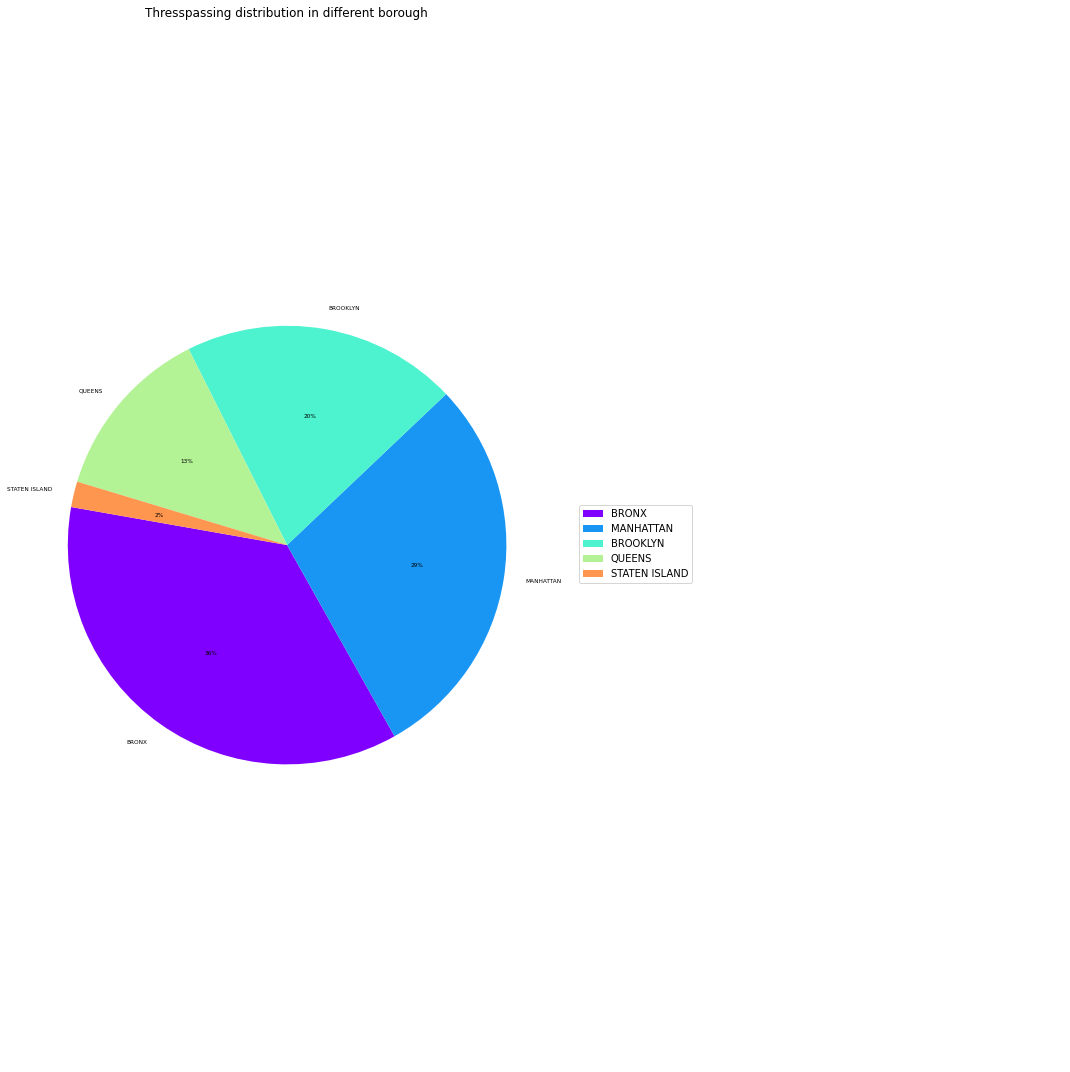

In [15]:
data = threspassing['ARREST_BORO']
data = data.replace(['K','Q','M','B','S'], ['BROOKLYN', 'QUEENS', 'MANHATTAN', 'BRONX', 'STATEN ISLAND'])
data = data.value_counts()
labels = data.index
plotPieChart(data,labels,"Thresspassing distribution in different borough")

Lets now have a view of collision data and how these collision distributed among boroughs

In [16]:
collisionData.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/14/2021,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN
1,04/13/2021,21:35,BROOKLYN,11217.0,40.68358,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,...,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN
2,04/15/2021,16:15,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4407665,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,04/13/2021,16:00,BROOKLYN,11222.0,NaN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,NaN,...,Unspecified,NaN,NaN,NaN,4407811,Sedan,NaN,NaN,NaN,NaN
4,04/12/2021,8:25,NaN,NaN,0.00000,0.00000,"(0.0, 0.0)",EDSON AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4406885,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


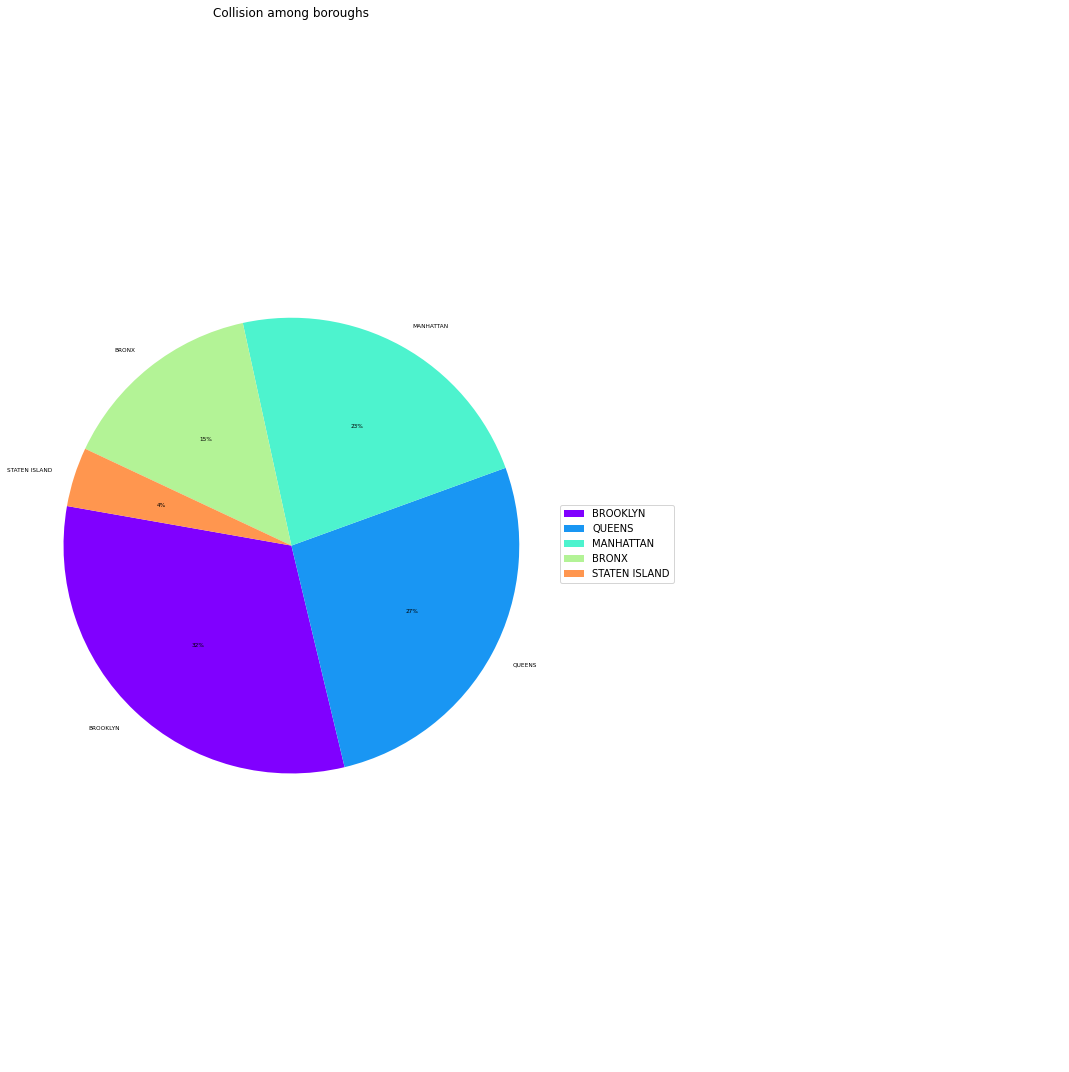

In [17]:
collisionBorough = collisionData['BOROUGH']
collisionBorough = collisionBorough.value_counts()
labels = collisionBorough.index
plotPieChart(collisionBorough,labels,"Collision among boroughs")

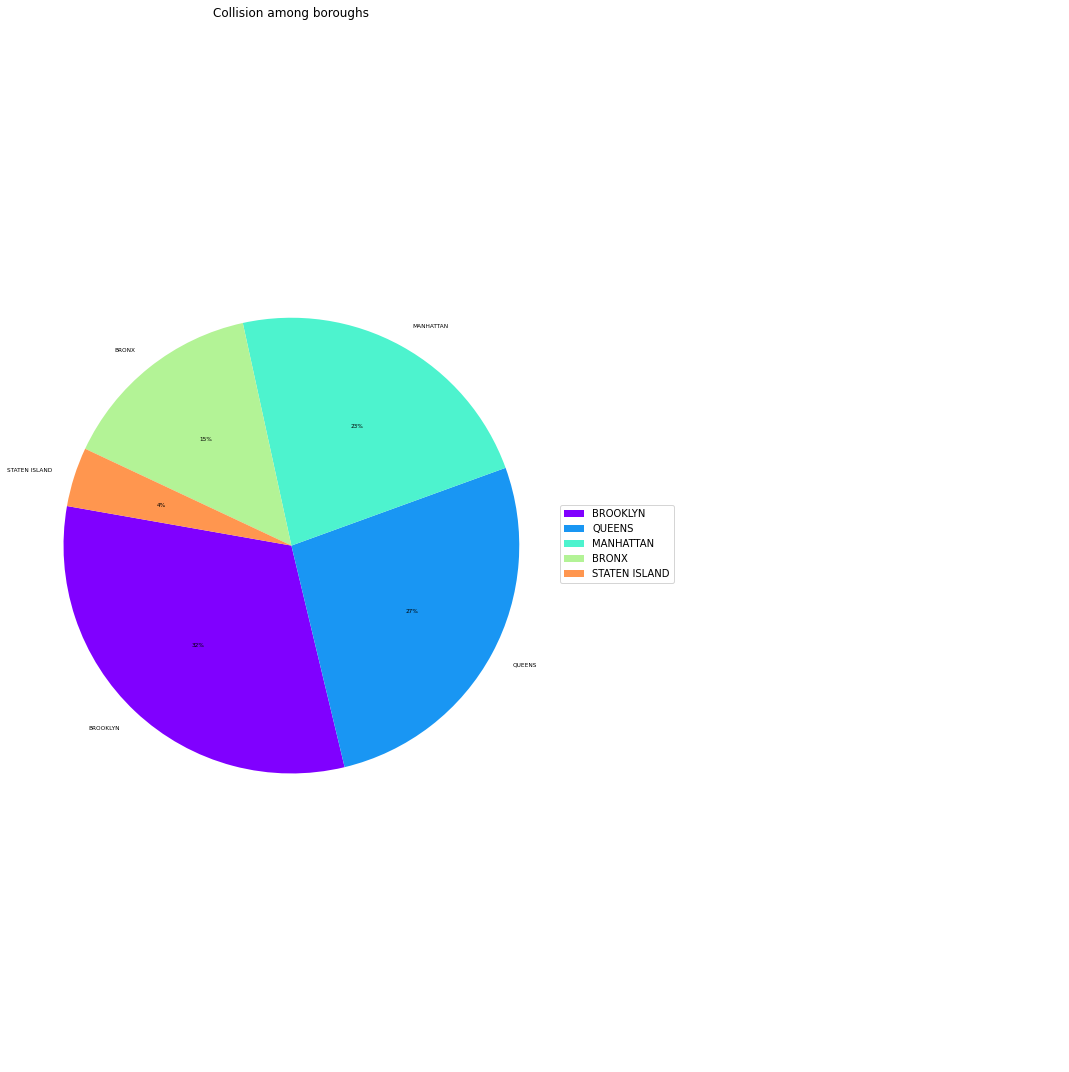

In [18]:
collisionBorough = collisionData['BOROUGH']
collisionBorough = collisionBorough.value_counts()
labels = collisionBorough.index
plotPieChart(collisionBorough,labels,"Collision among boroughs")

In [19]:
collisionVehicle = collisionData['VEHICLE TYPE CODE 1']
collisionVehicle = collisionVehicle.value_counts();
collisionVehicle.head()

Sedan                                  485499
PASSENGER VEHICLE                      416206
Station Wagon/Sport Utility Vehicle    385173
SPORT UTILITY / STATION WAGON          180291
Taxi                                    46386
Name: VEHICLE TYPE CODE 1, dtype: int64

Here we try to analyze the different car type of collision in different boroughs.

In [20]:
# this function extract exact number of collision in sedan,suv,taxi,and pick up truck in given borough.
def getBoroughDistribution(cityName,collisionData):
    borough = collisionData.loc[collisionData['BOROUGH']== cityName]
    borough = borough[borough['VEHICLE TYPE CODE 1'].notna()]
    borough['VEHICLE TYPE CODE 1'] = borough['VEHICLE TYPE CODE 1'].str.lower()
    borough.loc[borough['VEHICLE TYPE CODE 1'].str.contains('sedan'), 'VEHICLE TYPE CODE 1'] = 'sedan'
    borough.loc[borough['VEHICLE TYPE CODE 1'].str.contains('Sport'), 'VEHICLE TYPE CODE 1'] = 'SUV'
    sedanNum = len(borough.loc[borough['VEHICLE TYPE CODE 1'].str.contains('sedan')==True])
    pickUpNum = len(borough.loc[borough['VEHICLE TYPE CODE 1'].str.contains('pick')==True])
    taxiNum = len(borough.loc[borough['VEHICLE TYPE CODE 1'].str.contains('taxi')==True])
    SUVNum = len(borough.loc[borough['VEHICLE TYPE CODE 1'].str.contains('sport')==True])
    return [sedanNum,pickUpNum,taxiNum,SUVNum]

In [21]:
brooklyn = getBoroughDistribution('BROOKLYN',collisionData)
queens = getBoroughDistribution('QUEENS',collisionData)
bronx = getBoroughDistribution('BRONX',collisionData)
island = getBoroughDistribution('STATEN ISLAND',collisionData)
manhattan = getBoroughDistribution('MANHATTAN',collisionData)

In [22]:
columns = ["Sedan","Pick-up Truck", "Taxi","SUV"]
index = ['BROOKLYN','QUEENS','BRONX','STATEN ISLAND','MANHATTAN']
frames = [brooklyn,queens,bronx,island,manhattan]
frames = pd.DataFrame(frames,index = index,columns = columns)
frames

,Sedan,Pick-up Truck,Taxi,SUV
BROOKLYN,113814,7912,6875,125121
QUEENS,95752,7142,5402,115164
BRONX,57038,3600,4863,53613
STATEN ISLAND,15807,1564,80,16375
MANHATTAN,57291,7554,41442,67939


In [23]:
frames.reset_index(inplace=True)
frames = frames.rename(columns = {'index':'Borough'})
frames

,Borough,Sedan,Pick-up Truck,Taxi,SUV
0,BROOKLYN,113814,7912,6875,125121
1,QUEENS,95752,7142,5402,115164
2,BRONX,57038,3600,4863,53613
3,STATEN ISLAND,15807,1564,80,16375
4,MANHATTAN,57291,7554,41442,67939


<AxesSubplot:xlabel='Borough'>

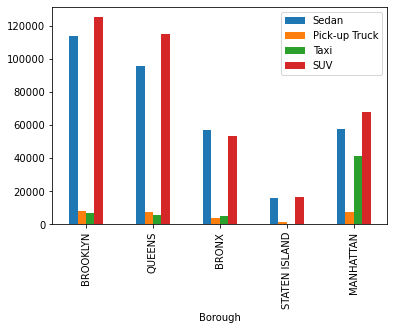

In [24]:
frames.plot(x='Borough',y=["Sedan","Pick-up Truck","Taxi","SUV"],kind ='bar')

In [25]:
airbnbData.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [26]:
avgData = airbnbData.groupby('neighbourhood_group')['price'].mean()
labels = avgData.index
labels

Index(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], dtype='object', name='neighbourhood_group')

And let's plot out the average price of airbnb rent price in each borough.

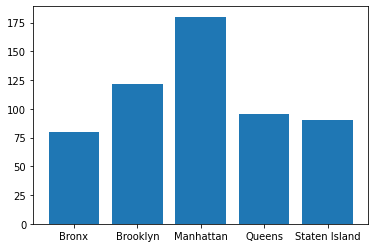

In [27]:
plt.bar(labels, avgData)
plt.show()

# Explore New York neighborhood data
Download and open json file from https://cocl.us/new_york_dataset

In [28]:
with open('data/nyu_2451_34572-geojson.json') as json_data:
    newyork_data = json.load(json_data)

In [29]:
neighborhoods_data = newyork_data['features']
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

Load json data into Pandas DataFrame

In [30]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough.upper(),
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude
0,BRONX,Wakefield,40.894705,-73.847201
1,BRONX,Co-op City,40.874294,-73.829939
2,BRONX,Eastchester,40.887556,-73.827806
3,BRONX,Fieldston,40.895437,-73.905643
4,BRONX,Riverdale,40.890834,-73.912585
...,...,...,...,...
301,MANHATTAN,Hudson Yards,40.756658,-74.000111
302,QUEENS,Hammels,40.587338,-73.805530
303,QUEENS,Bayswater,40.611322,-73.765968
304,QUEENS,Queensbridge,40.756091,-73.945631


Define a function that calculate the distance between a given point and neighborhoods

In [31]:
def get_neighborhood(location: tuple, borough: str) ->str:
    bor = neighborhoods.loc[neighborhoods.Borough == borough, ['Borough', 'Neighborhood', 'Latitude', 'Longitude']]
    bor['Distance'] = np.square(location[0] - bor['Latitude']) + np.square(location[1] - bor['Longitude'])
    min_index = bor['Distance'].idxmin()
    return bor.loc[min_index, 'Neighborhood']

In [32]:
get_neighborhood((40.895437, -73.905643), 'BRONX')

'Fieldston'

Select data between 2017 and 2019 and drop the lines which have no location information

In [33]:
collisionData = collisionData.dropna(subset=['BOROUGH', 'LATITUDE', 'LONGITUDE'], how='any')
collisionData['CRASH DATE'] = pd.to_datetime(collisionData['CRASH DATE'],format="%m/%d/%Y")
mask = (collisionData['CRASH DATE'] >= '2017-01-01') & (collisionData['CRASH DATE'] <= '2019-12-31')
collisionData_2017_2019 = collisionData.loc[mask].copy()
collisionData_2017_2019

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
13,2019-05-21,22:50,BROOKLYN,11201.0,40.697540,-73.983120,"(40.69754, -73.98312)",GOLD STREET,CONCORD STREET,NaN,...,Unspecified,NaN,NaN,NaN,4136992,�MBU,Taxi,NaN,NaN,NaN
161721,2017-02-19,16:10,BROOKLYN,11203.0,40.636981,-73.936543,"(40.6369807, -73.9365431)",FARRAGUT ROAD,EAST 42 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3618395,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
161722,2018-03-26,0:06,BROOKLYN,11203.0,40.637277,-73.931765,"(40.6372771, -73.9317652)",FARRAGUT ROAD,SCHENECTADY AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3869923,Sedan,Sedan,NaN,NaN,NaN
204678,2019-12-17,15:57,BRONX,10452.0,40.846096,-73.919190,"(40.846096, -73.91919)",FEATHERBED LANE,SHAKESPEARE AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4259787,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
204680,2019-12-28,9:30,MANHATTAN,10021.0,40.767494,-73.959330,"(40.767494, -73.95933)",EAST 70 STREET,2 AVENUE,NaN,...,Unspecified,Unspecified,NaN,NaN,4266236,Sedan,Station Wagon/Sport Utility Vehicle,Box Truck,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923320,2017-01-07,19:30,QUEENS,11427.0,40.724160,-73.754974,"(40.72416, -73.754974)",HILLSIDE AVENUE,HOLLIS COURT BOULEVARD,NaN,...,Unspecified,NaN,NaN,NaN,3593568,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
923321,2017-01-17,5:06,QUEENS,11422.0,40.659428,-73.732820,"(40.659428, -73.73282)",NaN,NaN,142-34 254 STREET,...,NaN,NaN,NaN,NaN,3599650,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
923322,2017-01-15,7:00,QUEENS,11373.0,40.745730,-73.886180,"(40.74573, -73.88618)",NaN,NaN,79-11 41 AVENUE,...,Unspecified,NaN,NaN,NaN,3598839,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
923325,2017-01-10,20:22,BROOKLYN,11229.0,40.594050,-73.958840,"(40.59405, -73.95884)",GRAVESEND NECK ROAD,SHEEPSHEAD BAY ROAD,NaN,...,Unspecified,NaN,NaN,NaN,3596679,Box Truck,Van,NaN,NaN,NaN


In [34]:
#for index, row in collisionData_2017_2019.iterrows():
 #   location = (row['LATITUDE'],row['LONGITUDE'])
  #  nbh = get_neighborhood(location, row['BOROUGH'])
   # collisionData_2017_2019.loc[index,'NBH'] = nbh

In [35]:
#print(collisionData_2017_2019['NBH'])

## Get the neighborhood for crime

In [36]:
#crimeData

In [37]:
#crimeData['ARREST_DATE'] = pd.to_datetime(crimeData['ARREST_DATE'],format="%m/%d/%Y")
#mask = (crimeData['ARREST_DATE'] >= '2017-01-01') & (crimeData['ARREST_DATE'] <= '2019-12-31')
#crimeData_2017_2019 = crimeData.loc[mask].copy()
#crimeData_2017_2019

In [38]:
#print(crimeData['ARREST_BORO'].unique())

In [39]:
#print(neighborhoods['Borough'].unique())

"BORO_NM " represents the borough where suspects were arrested, which may differ from the borough where crime happened.

In [40]:
#def getNameforBorough(letter:str)->str:
 #   if letter == 'M':
  #      borough= 'MANHATTAN'
   # elif letter =='B':
    #    borough= 'BRONX'
    #elif letter == 'K':
    #    borough= 'BROOKLYN'
    #elif letter == 'S':
     #   borough= 'STATEN ISLAND'
    #else:
     #   borough = 'QUEENS'
    #return borough

In [41]:
#neighborhoods.loc[neighborhoods['Neighborhood'] == 'Morningside Heights']

In [42]:
#collisionData_2017_2019.to_csv('data/collisionData_2017_2019.csv', index=False)
#crimeData_2017_2019.to_csv('data/crimeData_2017_2019.csv', index=False)

In [43]:
collisionData_NBH = pd.read_csv('Data/collisionData_2017_2019.csv')
crimeData_NBH = pd.read_csv('Data/crimeData_2017_2019.csv')

In [44]:
collisionData_NBH["NBH"]
crimeData_NBH["NBH"]

0         Morningside Heights
1                    Edenwald
2                Bedford Park
3                  North Side
4                  Mott Haven
                 ...         
741135             Ocean Hill
741136                Astoria
741137              Rossville
741138               Elmhurst
741139     Washington Heights
Name: NBH, Length: 741140, dtype: object

After we can find out which neighborhood a location is belong to, we now explore the sales data.

First we got our original data year to year in separate files of different borough. we need to merge it into one file first.

We use helper function from utils.py to process the data first and merge the data or each borough into one file

In [39]:
BronxData = pd.read_csv("Data/Bronx-mergeData.csv").dropna(subset=['Unit Price'])
QueensData = pd.read_csv("Data/Queens-mergeData.csv").dropna(subset=['Unit Price'])
BrooklynData = pd.read_csv("Data/Brooklyn-mergeData.csv").dropna(subset=['Unit Price'])
ManhattanData = pd.read_csv("Data/Manhattan-mergeData.csv").dropna(subset=['Unit Price'])
StatenIslandData = pd.read_csv("Data/StatenIsland-mergeData.csv").dropna(subset=['Unit Price'])

/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(co

For each Borough, we will find out the pick neighboor, we just pick from head and tail neighborhoods

In [6]:
def pickNeighborhood(BoroughData):
    neighborhoods = BoroughData["Neighborhood"].unique()
    afterAverage = BoroughData.groupby('Neighborhood').agg({'Unit Price':'mean'})
    afterAverage = afterAverage.sort_values("Unit Price",ascending = False)
    return afterAverage

Now we have the most expansive and inexpansive 

In [7]:
BronxData_selected = pickNeighborhood(BronxData)
QueensData_selected = pickNeighborhood(QueensData)
Brooklyn_selected = pickNeighborhood(BrooklynData)
Manhattan_selected = pickNeighborhood(ManhattanData)
StatenIsland_selected = pickNeighborhood(StatenIslandData)

In [8]:
BronxData_selected

,Unit Price
Neighborhood,
KINGSBRIDGE HTS/UNIV HTS,1407.121168
BELMONT,1213.678508
FORDHAM,820.232584
MELROSE/CONCOURSE,765.546864
CROTONA PARK,706.018519
...,...
CITY ISLAND,149.474553
BAYCHESTER,141.378663
WOODLAWN,105.682150


In [48]:
def appendDataToBorough(selected_data,collisionDataSet,crimData):
    for index, row in selected_data.iterrows():
        selected_data.loc[index]
        collisions = collisionDataSet.loc[collisionDataSet["NBH"].str.upper()==index]
        crimes = crimData.loc[crimData["NBH"].str.upper()==index]
        collisionWithDeathNum = collisions.loc[collisions["NUMBER OF PERSONS KILLED"]>0].shape[0]
        collisionWithSedanNum = collisions.loc[collisions["VEHICLE TYPE CODE 1"].str.contains("Sedan")==True].shape[0]
        collisionWithSUVNum = collisions.loc[collisions["VEHICLE TYPE CODE 1"].str.contains("Sport")==True].shape[0]
        theftCrimeNum = crimes.loc[crimes["OFNS_DESC"].str.contains("THEFT")==True].shape[0]
        selected_data.loc[index,"collisionWithDeath"] = collisionWithDeathNum*100
        selected_data.loc[index,"collisionWithSedan"] = collisionWithSedanNum
        selected_data.loc[index,"collisionWithSUV"] = collisionWithSUVNum
        selected_data.loc[index,"theftCrime"] = theftCrimeNum
        selected_data.replace(0, np.nan, inplace=True)

In [49]:
appendDataToBorough(QueensData_selected,collisionData_NBH,crimeData_NBH)
appendDataToBorough(BronxData_selected,collisionData_NBH,crimeData_NBH)
appendDataToBorough(Brooklyn_selected,collisionData_NBH,crimeData_NBH)
appendDataToBorough(Manhattan_selected,collisionData_NBH,crimeData_NBH)
appendDataToBorough(StatenIsland_selected,collisionData_NBH,crimeData_NBH)

In [50]:
QueensData_selected

,Unit Price,collisionWithDeath,collisionWithSedan,collisionWithSUV,theftCrime
Neighborhood,,,,,
LONG ISLAND CITY,1209.829274,100.0,659.0,557.0,41.0
REGO PARK,1125.000000,300.0,632.0,644.0,8.0
ASTORIA,1067.841377,100.0,938.0,847.0,64.0
FLUSHING-NORTH,921.080737,NaN,NaN,NaN,NaN
WOODSIDE,757.138079,400.0,1522.0,1248.0,90.0
...,...,...,...,...,...
GLEN OAKS,74.251391,NaN,NaN,NaN,NaN
JAMAICA BAY,68.750000,NaN,NaN,NaN,NaN
GLEN OAKS,0.124163,200.0,539.0,415.0,1.0


In [51]:
QueensFinal = QueensData_selected.dropna(how="any")
BronxFinal = BronxData_selected.dropna(how="any")
BrooklynFinal = Brooklyn_selected.dropna(how="any")
ManhattanFinal = Manhattan_selected.dropna(how="any")
StatenIslandFinal = StatenIsland_selected.dropna(how="any")

In [52]:
BronxFinal

,Unit Price,collisionWithDeath,collisionWithSedan,collisionWithSUV,theftCrime
Neighborhood,,,,,
BELMONT,1213.678508,200.0,840.0,644.0,32.0
FORDHAM,820.232584,200.0,1116.0,734.0,659.0
EAST TREMONT,474.790146,400.0,1192.0,931.0,302.0
SOUNDVIEW,335.281693,100.0,936.0,697.0,133.0
WILLIAMSBRIDGE,317.301046,200.0,881.0,595.0,90.0
WOODLAWN,105.682150,100.0,694.0,433.0,4.0


In [53]:
BrooklynFinal

,Unit Price,collisionWithDeath,collisionWithSedan,collisionWithSUV,theftCrime
Neighborhood,,,,,
BOERUM HILL,2392.003185,100.0,782.0,496.0,68.0
CLINTON HILL,2326.501771,100.0,696.0,629.0,95.0
GREENPOINT,1403.501381,300.0,949.0,898.0,15.0
BATH BEACH,1270.921244,500.0,912.0,795.0,53.0
SUNSET PARK,1173.327583,700.0,2074.0,1887.0,372.0
BENSONHURST,1092.599336,200.0,1181.0,1155.0,49.0
BUSHWICK,762.624205,300.0,2083.0,1524.0,332.0
CROWN HEIGHTS,757.559767,400.0,1390.0,630.0,58.0
DYKER HEIGHTS,684.042004,300.0,1369.0,742.0,4.0


<AxesSubplot:xlabel='Neighborhood'>

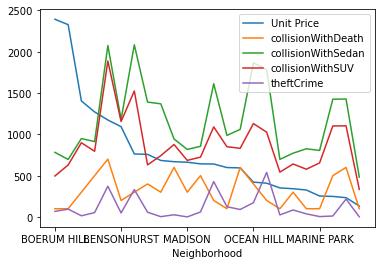

In [54]:
BrooklynFinal.plot()

<AxesSubplot:xlabel='Neighborhood'>

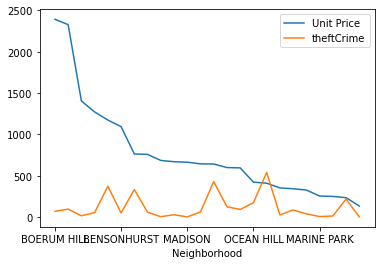

In [55]:
BrooklynFinal[["Unit Price","theftCrime"]].plot()

<AxesSubplot:xlabel='Neighborhood'>

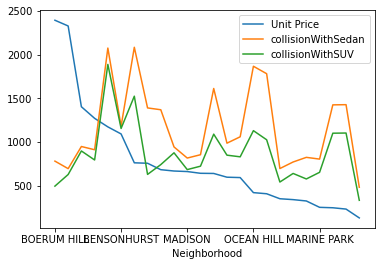

In [56]:
BrooklynFinal[["Unit Price","collisionWithSedan","collisionWithSUV"]].plot()

<AxesSubplot:xlabel='Neighborhood'>

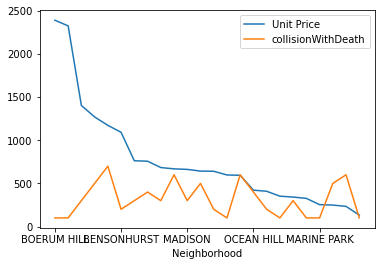

In [57]:
BrooklynFinal[["Unit Price","collisionWithDeath"]].plot()

<AxesSubplot:xlabel='Neighborhood'>

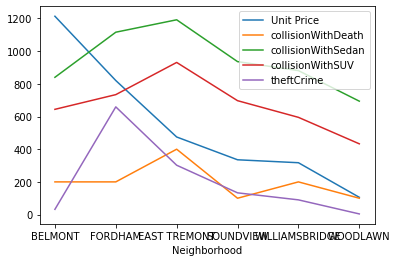

In [58]:
BronxFinal.plot()

<AxesSubplot:xlabel='Neighborhood'>

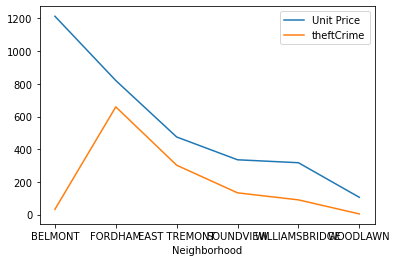

In [59]:
BronxFinal[["Unit Price","theftCrime"]].plot()

<AxesSubplot:xlabel='Neighborhood'>

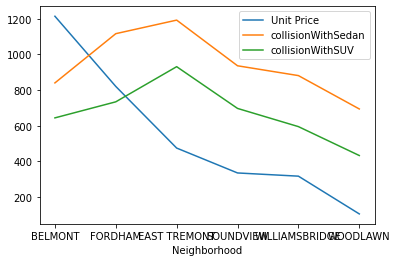

In [60]:
BronxFinal[["Unit Price","collisionWithSedan","collisionWithSUV"]].plot()

<AxesSubplot:xlabel='Neighborhood'>

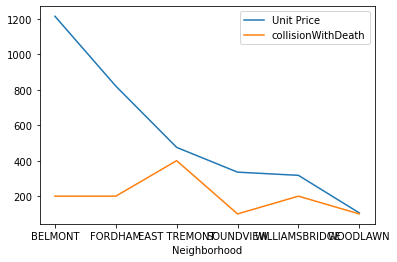

In [61]:
BronxFinal[["Unit Price","collisionWithDeath"]].plot()

<AxesSubplot:xlabel='Neighborhood'>

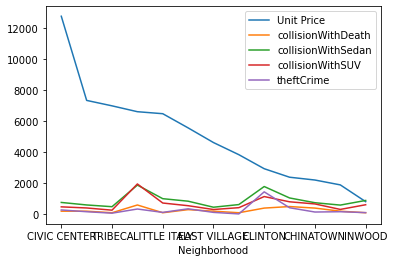

In [62]:
ManhattanFinal.plot()

<AxesSubplot:xlabel='Neighborhood'>

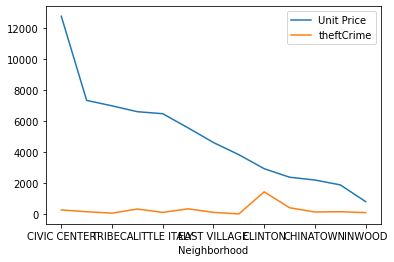

In [63]:
ManhattanFinal[["Unit Price","theftCrime"]].plot()

<AxesSubplot:xlabel='Neighborhood'>

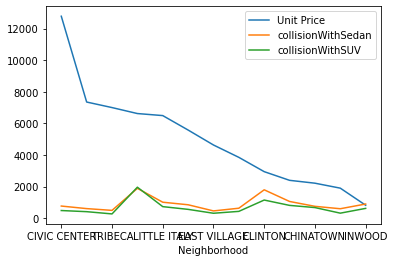

In [64]:
ManhattanFinal[["Unit Price","collisionWithSedan","collisionWithSUV"]].plot()

<AxesSubplot:xlabel='Neighborhood'>

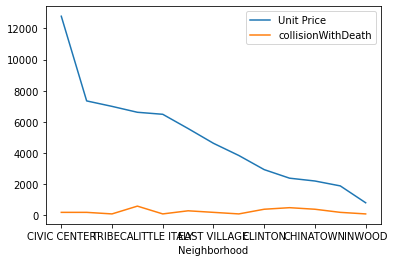

In [65]:
ManhattanFinal[["Unit Price","collisionWithDeath"]].plot()

<AxesSubplot:xlabel='Neighborhood'>

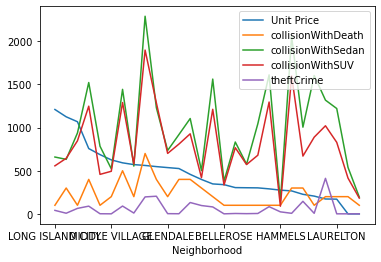

In [66]:
QueensFinal.plot()

<AxesSubplot:xlabel='Neighborhood'>

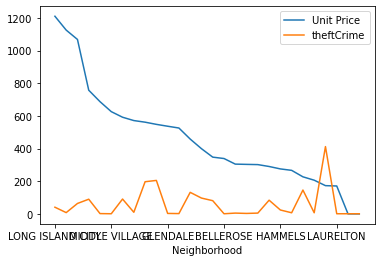

In [67]:
QueensFinal[["Unit Price","theftCrime"]].plot()

<AxesSubplot:xlabel='Neighborhood'>

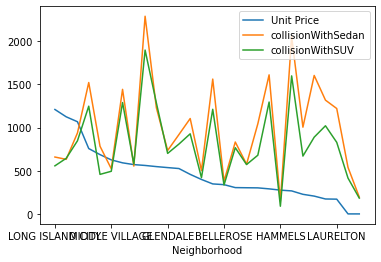

In [68]:
QueensFinal[["Unit Price","collisionWithSedan","collisionWithSUV"]].plot()

<AxesSubplot:xlabel='Neighborhood'>

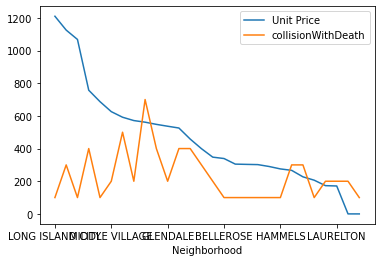

In [69]:
QueensFinal[["Unit Price","collisionWithDeath"]].plot()

# Find target neighborhood
Read collision and crime data with neighborhoods

In [84]:
collisionData_NBH = pd.read_csv('Data/collisionData_NBH.csv')
crimeData_NBH = pd.read_csv('Data/crimeData_NBH.csv')

/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [85]:
print(collisionData_NBH['NBH'].head())
print(crimeData_NBH['NBH'].head())

0      Vinegar Hill
1     East Flatbush
2     East Flatbush
3    Morris Heights
4        Lenox Hill
Name: NBH, dtype: object
0        Mott Haven
1    Lincoln Square
2     Cypress Hills
3        Ocean Hill
4        Morrisania
Name: NBH, dtype: object


The number of crimes and collisions in each neighborhood from 2012 to 2019

In [287]:
nbh_collisions = numCollisions(collisionData_NBH)
nbh_crimes = numCrimes(crimeData_NBH)

Get the change rate of collision and crime data

In [103]:
collision_change_rate = change_rate_by_year(nbh_collisions, 100)
crime_change_rate = change_rate_by_year(nbh_crimes, 50)

In [104]:
crime_change_rate

,Borough,NBH,Overall_Change_Rate,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019
0,BRONX,Mott Haven,-0.011134,0.525364,0.568842,0.394704,0.546557,0.238536,0.294652,0.442040
1,BRONX,Morrisania,-0.200774,0.744983,0.436526,0.472632,0.473760,0.274721,0.090302,0.176260
2,BRONX,Norwood,0.041554,0.580378,0.519563,0.184687,0.625236,0.305763,0.478451,0.442578
3,BRONX,Edenwald,0.394155,0.704447,0.517133,0.488102,0.538572,0.422206,0.557934,0.352283
4,BRONX,Belmont,-0.031005,0.413439,0.393312,0.339593,0.449757,0.505550,0.417499,0.404226
...,...,...,...,...,...,...,...,...,...,...
147,QUEENS,Briarwood,-0.158389,0.756505,0.357458,0.532778,0.142054,0.310897,0.203700,-0.183616
148,QUEENS,Queensbridge,-0.335500,0.414500,0.485724,-0.056799,0.411364,0.160599,0.146498,0.008067
149,QUEENS,Far Rockaway,0.156925,0.271445,0.565111,0.410640,0.315079,0.282430,0.412264,0.083914
150,QUEENS,Queensboro Hill,-0.158224,0.422857,0.424910,-0.041160,0.139603,0.830289,0.016306,0.278366


In [105]:
collision_change_rate

,Borough,NBH,Overall_Change_Rate,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019
0,BROOKLYN,Vinegar Hill,-0.208991,-0.202324,-0.044748,0.452098,-0.023893,-0.105012,0.103177,0.083034
1,BROOKLYN,East Flatbush,-0.003073,0.047488,0.020533,0.114143,0.011211,0.088391,-0.011979,0.119427
2,BROOKLYN,Prospect Heights,-0.181112,0.283534,0.086712,0.012479,-0.120273,-0.027901,0.023927,-0.036741
3,BROOKLYN,Borough Park,-0.051974,0.128963,0.090139,0.095408,-0.169517,0.220709,0.152602,-0.121669
4,BROOKLYN,Cobble Hill,0.060796,0.057250,0.071485,0.060796,0.135517,0.057698,-0.005892,0.075134
...,...,...,...,...,...,...,...,...,...,...
186,STATEN ISLAND,Grant City,0.009138,0.358695,0.685091,0.576792,0.686185,0.641881,0.690366,0.121650
187,STATEN ISLAND,Oakwood,-0.006006,0.479909,0.700704,0.411722,0.590334,0.663620,0.556774,0.223276
188,STATEN ISLAND,Grymes Hill,0.283185,0.978837,0.503669,0.632447,0.479976,0.778245,0.791881,0.154924
189,STATEN ISLAND,Tompkinsville,0.633944,0.983151,0.600461,0.728301,0.528245,0.872650,0.574173,0.340205


Use the change rate to find our target neighborhoods

In [107]:
collision_tar_nbh = find_tar_nbh(collision_change_rate)
crime_tar_nbh = find_tar_nbh(crime_change_rate)

In [108]:
collision_tar_nbh

,Borough,NBH,Overall_Change_Rate,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019
0,BROOKLYN,Crown Heights,-0.298473,0.143765,0.035914,0.188267,-0.195229,-0.080435,0.042577,-0.062975
1,BROOKLYN,Starrett City,0.421855,0.147244,0.191137,0.363705,-0.040233,-0.070694,0.264764,-0.014744
2,BRONX,High Bridge,-0.402006,-0.250797,-0.180686,0.046944,-0.427400,-0.251707,0.101143,-0.141511
3,BRONX,Mott Haven,0.267124,-0.046800,-0.164113,0.110340,-0.237725,-0.088122,-0.094939,0.003604
4,MANHATTAN,Manhattanville,-0.220125,0.477791,0.367607,0.406001,-0.002892,0.167641,0.349034,0.154229
5,MANHATTAN,Financial District,0.230314,0.406434,0.423369,0.354542,0.186588,0.413019,0.485162,0.278452
6,QUEENS,Ravenswood,-0.334970,0.031697,-0.033004,0.054398,-0.299136,-0.129556,-0.159004,0.110840
7,QUEENS,Rockaway Park,0.457887,-0.042113,-0.017113,-0.196600,0.748512,-0.043661,-0.135294,0.199382
8,STATEN ISLAND,Willowbrook,-0.304840,0.334504,-0.233859,0.213309,0.558548,1.823699,0.433548,0.326091
9,STATEN ISLAND,Tompkinsville,0.633944,0.983151,0.600461,0.728301,0.528245,0.872650,0.574173,0.340205


In [109]:
crime_tar_nbh

,Borough,NBH,Overall_Change_Rate,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019
0,BRONX,Hunts Point,-0.247713,0.423520,0.434657,0.290966,0.603183,0.250750,0.427668,0.041885
1,BRONX,Woodlawn,0.934711,0.314992,0.811974,0.665149,0.379918,0.597688,0.979593,0.443691
2,MANHATTAN,Greenwich Village,-0.170851,0.420800,0.900376,0.411975,0.626827,0.465175,0.095901,0.226895
3,MANHATTAN,Lenox Hill,0.585306,0.597427,0.548199,0.786019,0.398437,0.848985,0.461821,0.682882
4,BROOKLYN,Dumbo,-0.253562,0.259258,0.696580,0.124328,0.949304,0.779717,0.075723,0.049709
5,BROOKLYN,Dyker Heights,0.849559,1.001733,0.763920,0.351761,0.825015,0.272079,0.494223,0.723813
6,QUEENS,Queensbridge,-0.335500,0.414500,0.485724,-0.056799,0.411364,0.160599,0.146498,0.008067
7,QUEENS,Bellaire,0.464312,0.471831,0.385592,0.303002,0.407013,0.338896,0.411956,0.285889


# Analyze the correlation between crimes, collisions and property prices
Read the property sales data, collisions and crimes data

In [9]:
nbh_collisions = pd.read_csv('data/collisions_by_year.csv')
nbh_crimes = pd.read_csv('data/crimes_by_year.csv')

In [110]:
QueensData['Neighborhood'] = QueensData['Neighborhood'].str.rstrip()
BronxData['Neighborhood'] = BronxData['Neighborhood'].str.rstrip()
BrooklynData['Neighborhood'] = BrooklynData['Neighborhood'].str.rstrip()
ManhattanData['Neighborhood'] = ManhattanData['Neighborhood'].str.rstrip()
StatenIslandData['Neighborhood'] = StatenIslandData['Neighborhood'].str.rstrip()
collision_tar_nbh['NBH'] = collision_tar_nbh['NBH'].str.upper()
crime_tar_nbh['NBH'] = crime_tar_nbh['NBH'].str.upper()
nbh_collisions['NBH'] = nbh_collisions['NBH'].str.upper()
nbh_crimes['NBH'] = nbh_crimes['NBH'].str.upper()

In [246]:
QueensChangeRate = pd.read_csv('data/QueensChangeRate.csv').fillna(0)
BronxChangeRate = pd.read_csv('data/BronxChangeRate.csv').fillna(0)
ManhattanChangeRate = pd.read_csv('data/ManhattanChangeRate.csv').fillna(0)
BrooklynChangeRate = pd.read_csv('data/BrooklynChangeRate.csv').fillna(0)
StatenChangeRate = pd.read_csv('data/StatenChangeRate.csv').fillna(0)

Crime plots

In [251]:
def crimePlot(priceTar: pd.DataFrame, crimeTar: pd.DataFrame, priceNBH: str, crimeNBH: str):
    price = priceTar[priceTar['NBH'].str.contains(priceNBH)].iloc[:, 4:]
    if len(price) > 1:
        price = pd.DataFrame(price.mean()).T
    res = pd.concat([price, crimeTar[crimeTar['NBH'].str.contains(crimeNBH)].iloc[:, 3:]])
    res.index = ['Price', 'Crimes']
    res.T.plot(title=crimeNBH, figsize=(10, 6))

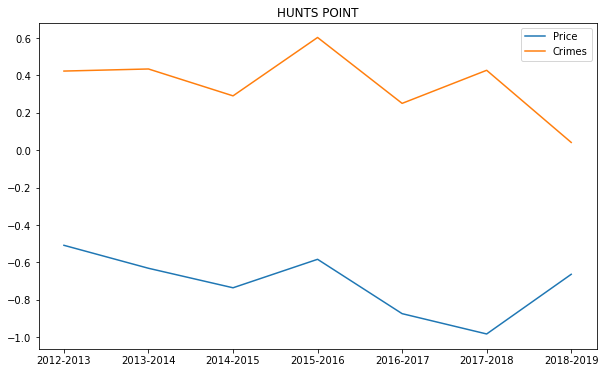

In [252]:
crimePlot(BronxChangeRate, crime_tar_nbh, 'HUNTS POINT', 'HUNTS POINT')

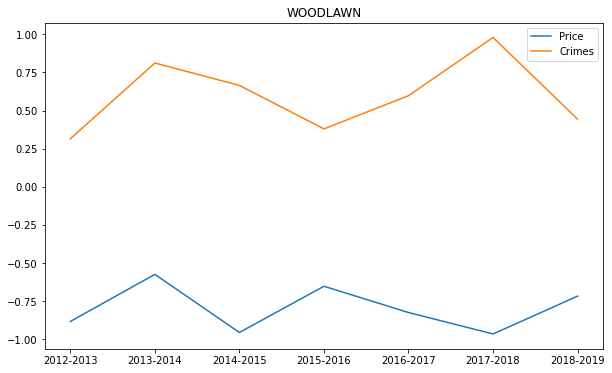

In [253]:
crimePlot(BronxChangeRate, crime_tar_nbh, 'WOODLAWN', 'WOODLAWN')

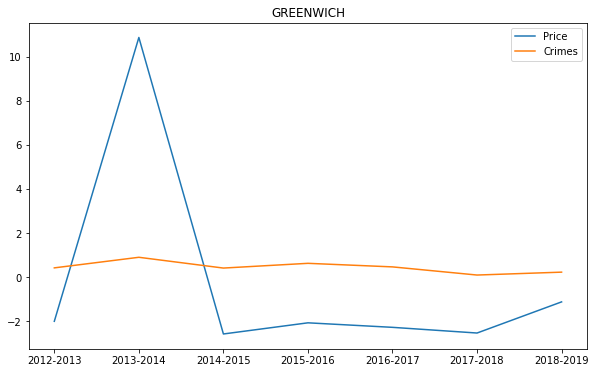

In [254]:
crimePlot(ManhattanChangeRate, crime_tar_nbh, 'GREENWICH', 'GREENWICH')

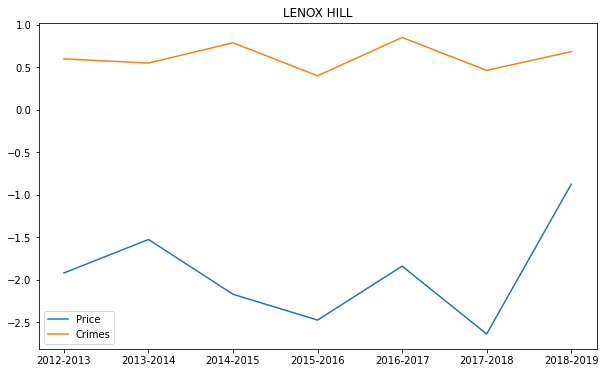

In [255]:
crimePlot(ManhattanChangeRate, crime_tar_nbh, 'UPPER EAST SIDE \(59-79\)', 'LENOX HILL')

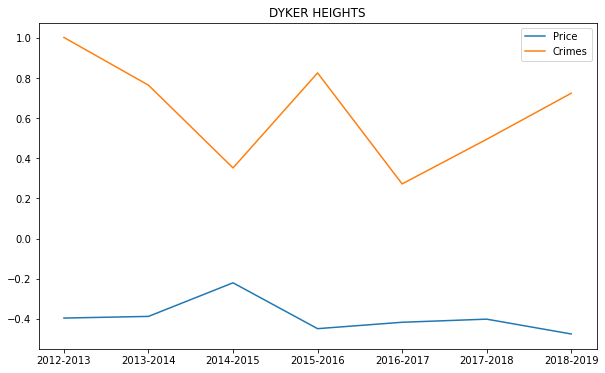

In [256]:
crimePlot(BrooklynChangeRate, crime_tar_nbh, 'DYKER HEIGHTS', 'DYKER HEIGHTS')

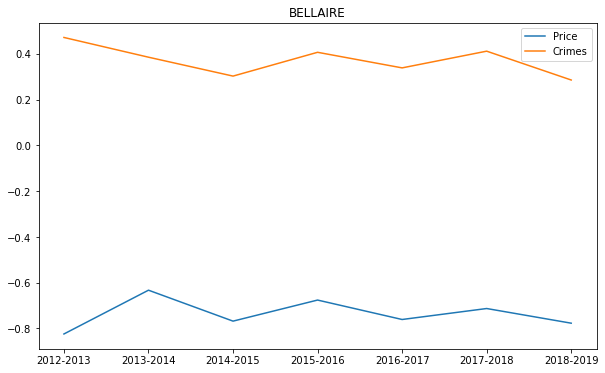

In [257]:
crimePlot(QueensChangeRate, crime_tar_nbh, 'QUEENS VILLAGE', 'BELLAIRE')

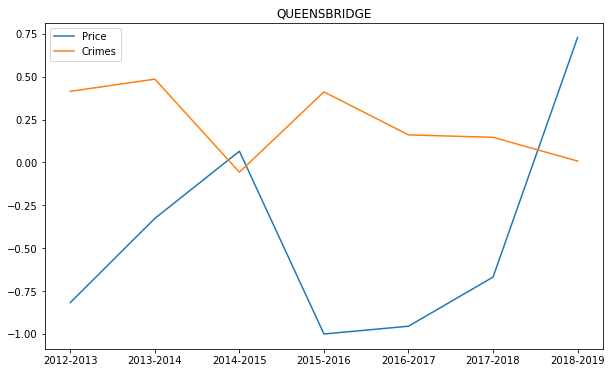

In [258]:
crimePlot(QueensChangeRate, crime_tar_nbh, 'LONG ISLAND CITY', 'QUEENSBRIDGE')

Collision plots

In [260]:
def collisionPlot(priceTar: pd.DataFrame, collisionTar: pd.DataFrame, priceNBH: str, collisionNBH: str):
    price = priceTar[priceTar['NBH'].str.contains(priceNBH)].iloc[:, 4:]
    if len(price) > 1:
        price = pd.DataFrame(price.mean()).T
    res = pd.concat([price, collisionTar[collisionTar['NBH'].str.contains(collisionNBH)].iloc[:, 3:]])
    res.index = ['Price', 'Crimes']
    res.T.plot(title=collisionNBH, figsize=(10, 6))

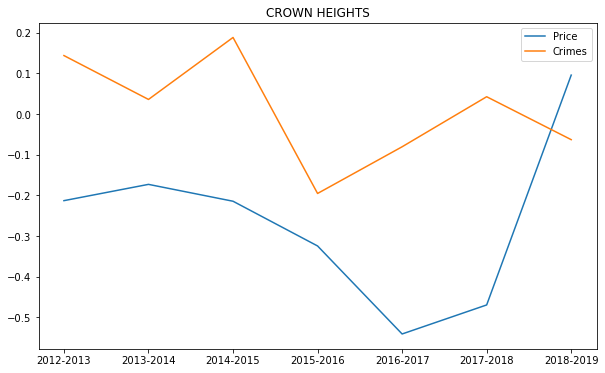

In [261]:
collisionPlot(BrooklynChangeRate, collision_tar_nbh, 'CROWN HEIGHTS', 'CROWN HEIGHTS')

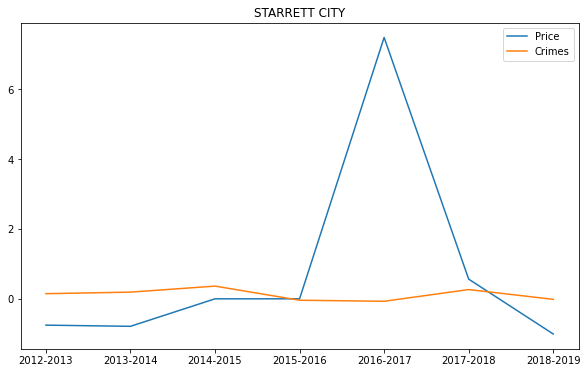

In [262]:
collisionPlot(BrooklynChangeRate, collision_tar_nbh, 'SPRING CREEK', 'STARRETT CITY')

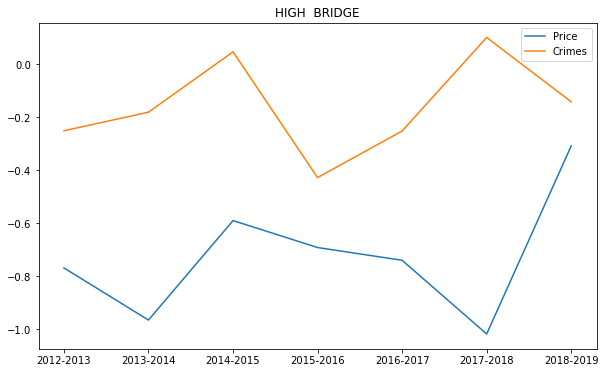

In [270]:
collisionPlot(BronxChangeRate, collision_tar_nbh, 'HIGHBRIDGE', 'HIGH  BRIDGE')

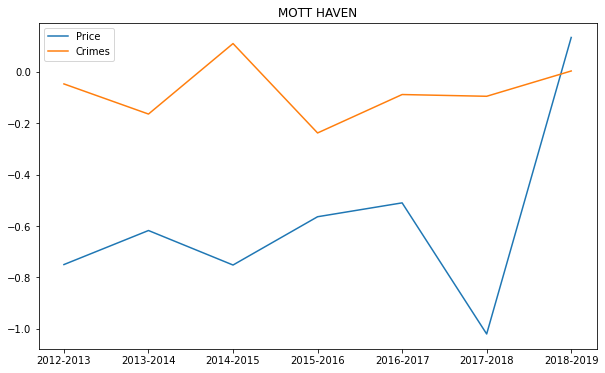

In [272]:
collisionPlot(BronxChangeRate, collision_tar_nbh, 'MOTT HAVEN', 'MOTT HAVEN')

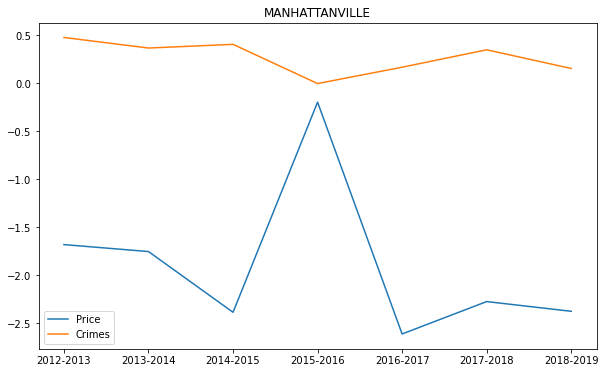

In [274]:
collisionPlot(ManhattanChangeRate, collision_tar_nbh, 'MANHATTAN VALLEY', 'MANHATTANVILLE')

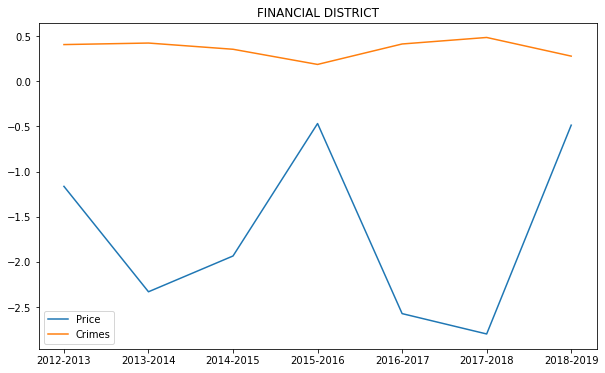

In [276]:
collisionPlot(ManhattanChangeRate, collision_tar_nbh, 'FINANCIAL', 'FINANCIAL DISTRICT')

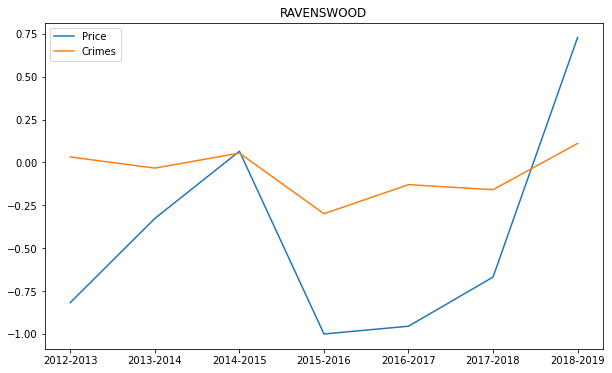

In [277]:
collisionPlot(QueensChangeRate, collision_tar_nbh, 'LONG ISLAND CITY', 'RAVENSWOOD')

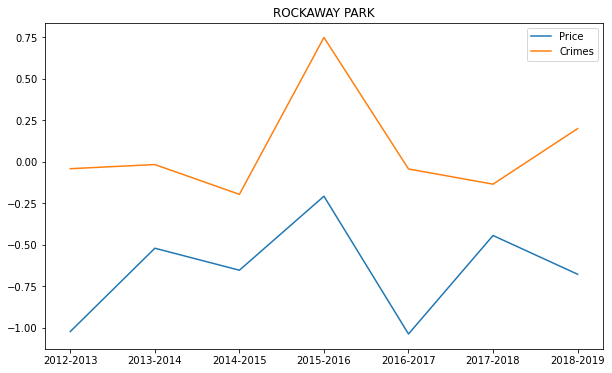

In [278]:
collisionPlot(QueensChangeRate, collision_tar_nbh, 'ROCKAWAY PARK', 'ROCKAWAY PARK')

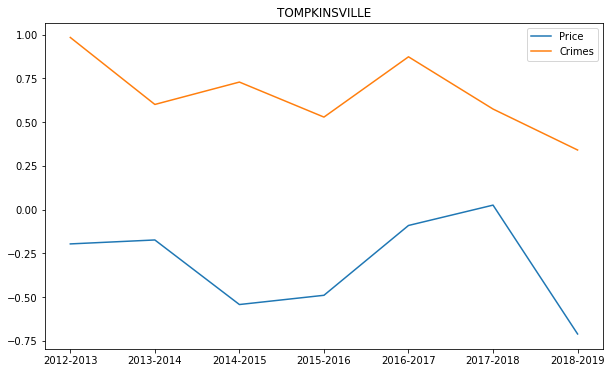

In [281]:
collisionPlot(StatenChangeRate, collision_tar_nbh, 'TOMPKINSVILLE', 'TOMPKINSVILLE')

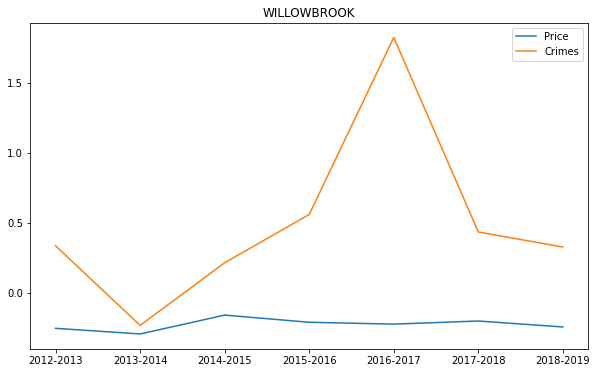

In [282]:
collisionPlot(StatenChangeRate, collision_tar_nbh, 'WILLOWBROOK', 'WILLOWBROOK')

# Correlation check on hypothesis 4

In [114]:
# load the data for target nbh
collision_analysis = pd.read_csv("Data/collision_tar_nbh.csv").dropna()
crime_analysis = pd.read_csv("Data/crime_tar_nbh.csv").dropna()

In [115]:
collision_analysis

,Borough,NBH,Overall_Change_Rate,2012 - 2013,2013 - 2014,2014 - 2015,2015 - 2016,2016 - 2017,2017 - 2018,2018 - 2019
0,BROOKLYN,Crown Heights,-0.362816,0.079422,-0.028428,0.123924,-0.259571,-0.144778,-0.021765,-0.127318
1,BROOKLYN,Starrett City,0.357513,0.082902,0.126794,0.299363,-0.104575,-0.135036,0.200422,-0.079086
2,BRONX,High Bridge,-0.274194,-0.122984,-0.052874,0.174757,-0.299587,-0.123894,0.228956,-0.013699
3,BRONX,Mott Haven,0.394937,0.081013,-0.036300,0.238153,-0.109912,0.039691,0.032874,0.131417
4,MANHATTAN,Manhattanville,-0.602679,0.095238,-0.014946,0.023448,-0.385445,-0.214912,-0.033520,-0.228324
5,MANHATTAN,Financial District,-0.152239,0.023881,0.040816,-0.028011,-0.195965,0.030466,0.102609,-0.104101
6,QUEENS,Ravenswood,-0.317857,0.048810,-0.015891,0.071511,-0.282024,-0.112444,-0.141892,0.127953
7,QUEENS,Rockaway Park,0.475000,-0.025000,0.000000,-0.179487,0.765625,-0.026549,-0.118182,0.216495
8,STATEN ISLAND,Willowbrook,-0.946721,-0.307377,-0.875740,-0.428571,-0.083333,1.181818,-0.208333,-0.315789
9,STATEN ISLAND,Tompkinsville,-0.007937,0.341270,-0.041420,0.086420,-0.113636,0.230769,-0.067708,-0.301676


In [119]:
# convert the object to date
def convert_date(df:pd.DataFrame,column_name:str):
    df.loc[:,column_name] =  pd.to_datetime(df.loc[:,column_name], format='%Y-%m-%d %H:%M:%S')

In [120]:
# convert the record in crime data to a new dataframe using melt
def get_target_crime_data(crimedata:pd.DataFrame, crime_tar: str):
    df = crimedata.loc[crimedata['NBH'] == crime_tar]
    df.drop(['Overall_Change_Rate','Borough','NBH'],axis = 1,inplace = True)
    df = df.melt(id_vars= None,var_name= "year", value_name="crime change rate")
    # df = df.pivot_table(index = None,columns='Year')
    return df

In [121]:
# find the unit price for each year in the nbh price data
def find_unit_price(price_data:pd.DataFrame,year:str):
    # TODO: if can not find
    mask = (price_data['Sale Date'] >= year + '-01-01') & (price_data['Sale Date'] <= year + '-12-31')
    this_year = price_data.loc[mask]
    average_price = this_year['Unit Price'].mean()
    return average_price

In [122]:
# find the price change rate per year
def find_change_rate(previousYear, currentYear, df:pd.DataFrame):
    # TODO: if can not find
    avgUnitPrice = find_unit_price()
    previousAvg = find_unit_price(df, previousYear)
    currentAvg = find_unit_price(df,currentYear)
    price_change_rate = (currentAvg - previousAvg)/previousAvg
    return price_change_rate

In [128]:
# combine the record in estate price to current nbh crime rate data
def combine_price_otherVar(df:pd.DataFrame,target: str,price_borough_data:pd.DataFrame,):
    target = target.upper()
    price_borough_data = price_borough_data[price_borough_data["Neighborhood"].str.contains(target)]
    for index, row in df.iterrows():
        year = row[0]
        year_list =year.split("-")
        price_rate = find_change_rate(year_list[0],year_list[1],price_borough_data)
        df.loc[index,"price rate"] = price_rate

In [124]:
def test_correlation(df, var1:str, var2:str):
    # test the correlation between var1  and var 2
    # check normality
    x = df[var1].to_numpy()
    y = df[var2].to_numpy()

    stat, p1 = shapiro(x)
    stat, p2 = shapiro(y)

    alpha = 0.05
    if p1 > alpha and p2 > alpha:
        print('{} and {} is normal distributed'.format(var1, var2))
    else:
        print('{} and {} is not normal distributed'.format(var1, var2))

    # if parametric, use Pearson's r
    # TODO: The missing data
    pr = scipy.stats.pearsonr(x, y)
    print("the Pearson's r is {}".format(pr))

In [131]:
collision_tar_nbh.to_csv('data/collisionTarNbh.csv')

In [132]:
crime_tar_nbh.to_csv('data/crimeTarNbh.csv')

In [ ]:
target = "Hunts Point"
price_borough_data = BronxData
df = Crown_collision_Price

target = target.upper()
price_borough_data = price_borough_data[price_borough_data["Neighborhood"].str.contains(target)]
for index, row in df.iterrows():
    year = row[0]
    year_list =year.split(" - ")
    print("0",year_list[0])
    print("1",year_list[1])
    previousAvg =find_unit_price(price_borough_data,year_list[0])
    print("pre",previousAvg)
    currentAvg = find_unit_price(price_borough_data,year_list[1])
    print("cu",currentAvg)
    price_change_rate = (currentAvg - previousAvg)/previousAvg

    df.loc[index,"price rate"] = price_change_rate

In [129]:
# process and analysis the correlation for nbh HuntsPoint
HuntsPoint_crimePrice = get_target_crime_data(crime_tar_nbh,"Hunts Point")
combine_price_otherVar(HuntsPoint_crimePrice,"Hunts Point",BronxData)
# test_correlation(HuntsPoint_crimePrice, "crime change rate","price rate")

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [130]:
HuntsPoint_crimePrice

,year,crime change rate


In [ ]:
# process and analysis the correlation for nbh Woodlawn
Woodlawn_crimePrice = get_target_crime_data(crime_analysis,"Woodlawn")
combine_price_otherVar(Woodlawn_crimePrice,"Woodlawn",BronxData)
test_correlation(Woodlawn_crimePrice, "crime change rate","price rate")

In [ ]:
# process and analysis the correlation for nbh Greenwich Village
Greenwich_crimePrice = get_target_crime_data(crime_analysis,"Woodlawn")
combine_price_otherVar(Greenwich_crimePrice,"Woodlawn",ManhattanData)
test_correlation(Greenwich_crimePrice, "crime change rate","price rate")

In [ ]:
# process and analysis the correlation for nbh Lenox Hill
Lenox_crimePrice = get_target_crime_data(crime_analysis,"Lenox Hill")
combine_price_otherVar(Lenox_crimePrice,"Lenox Hill",ManhattanData)
test_correlation(Lenox_crimePrice, "crime change rate","price rate")

In [ ]:
# process and analysis the correlation for nbh Dumbo
Dumbo_crimePrice = get_target_crime_data(crime_analysis,"Dumbo")
combine_price_otherVar(Dumbo_crimePrice,"Dumbo",BrooklynData)
test_correlation(Dumbo_crimePrice, "crime change rate","price rate")

In [ ]:
# process and analysis the correlation for nbh Dyker Heights
Dyker_crimePrice = get_target_crime_data(crime_analysis,"Dyker Heights")
combine_price_otherVar(Dyker_crimePrice,"Dyker Heights",BrooklynData)
test_correlation(Dyker_crimePrice, "crime change rate","price rate")

In [ ]:
# process and analysis the correlation for nbh Queensbridge
Queensbridge_crimePrice = get_target_crime_data(crime_analysis,"Queensbridge")
combine_price_otherVar(Queensbridge_crimePrice,"Queensbridge",QueensData)
test_correlation(Queensbridge_crimePrice, "crime change rate","price rate")

In [ ]:
# process and analysis the correlation for nbh Bellaire
Bellaire_crimePrice = get_target_crime_data(crime_analysis,"Bellaire")
combine_price_otherVar(Bellaire_crimePrice,"Bellaire",QueensData)
test_correlation(Bellaire_crimePrice, "crime change rate","price rate")

# check the correlation between collision and house price

In [ ]:
# convert the record in crime data to a new dataframe using melt
def get_target_collision_data(collisiondata:pd.DataFrame, collision_tar: str):
    df = collisiondata.loc[collisiondata['NBH'] == collision_tar]
    df.drop(['Overall_Change_Rate','Borough','NBH'],axis = 1,inplace = True)
    df = df.melt(id_vars= None,var_name= "year", value_name="collision change rate")
    # df = df.pivot_table(index = None,columns='Year')
    return df

In [ ]:
#TODO:  the collision data's year has two space in cell, while crime data's year has one space in cell

In [ ]:
def combine_price_collision(df:pd.DataFrame,target: str,price_borough_data:pd.DataFrame,):
    target = target.upper()
    price_borough_data = price_borough_data[price_borough_data["Neighborhood"].str.contains(target)]
    for index, row in df.iterrows():
        year = row[0]
        year_list =year.split(" - ")
        price_rate = find_change_rate(year_list[0],year_list[1],price_borough_data)
        df.loc[index,"price rate"] = price_rate

In [ ]:
# process and analysis the correlation for nbh Crown Heights
Crown_collision_Price  = get_target_collision_data(collision_analysis,"Crown Heights")
combine_price_collision(Crown_collision_Price,"Crown Heights",BrooklynData)
test_correlation(Crown_collision_Price , "collision change rate","price rate")

In [ ]:
# process and analysis the correlation for nbh Starrett City
Starrett_collision_Price  = get_target_collision_data(collision_analysis,"Starrett City")
combine_price_collision(Starrett_collision_Price,"Starrett City",BrooklynData)
test_correlation(Starrett_collision_Price , "collision change rate","price rate")

In [ ]:
# process and analysis the correlation for nbh High  Bridge
High_Bridge_collision_Price  = get_target_collision_data(collision_analysis,"High  Bridge")
combine_price_collision(High_Bridge_collision_Price,"High  Bridge",BronxData)
test_correlation(High_Bridge_collision_Price , "collision change rate","price rate")

In [ ]:
# process and analysis the correlation for nbh Mott Haven
Mott_Haven_collision_Price  = get_target_collision_data(collision_analysis,"Mott Haven")
combine_price_collision(Mott_Haven_collision_Price,"Mott Haven",BronxData)
test_correlation(Mott_Haven_collision_Price , "collision change rate","price rate")

In [ ]:
# process and analysis the correlation for nbh Manhattanville
Manhattanville_collision_Price  = get_target_collision_data(collision_analysis,"Manhattanville")
combine_price_collision(Manhattanville_collision_Price,"Manhattanville",ManhattanData)
test_correlation(Manhattanville_collision_Price , "collision change rate","price rate")

In [ ]:
# process and analysis the correlation for nbh Financial District
FinancialDistrict_collision_Price  = get_target_collision_data(collision_analysis,"Financial District")
combine_price_collision(FinancialDistrict_collision_Price,"Financial District",ManhattanData)
test_correlation(FinancialDistrict_collision_Price , "collision change rate","price rate")

In [ ]:
# process and analysis the correlation for nbh Ravenswood
Ravenswood_collision_Price  = get_target_collision_data(collision_analysis,"Ravenswood")
combine_price_collision(Ravenswood_collision_Price,"Financial District",QueensData)
test_correlation(Ravenswood_collision_Price , "collision change rate","price rate")

In [ ]:
# process and analysis the correlation for nbh Rockaway Park
RockawayPark_collision_Price  = get_target_collision_data(collision_analysis,"Rockaway Park")
combine_price_collision(RockawayPark_collision_Price,"Rockaway Park",QueensData)
test_correlation(RockawayPark_collision_Price , "collision change rate","price rate")

In [ ]:
# process and analysis the correlation for nbh Willowbrook
Willowbrook_collision_Price  = get_target_collision_data(collision_analysis,"Willowbrook")
combine_price_collision(Willowbrook_collision_Price,"Willowbrook",StatenIslandData)
test_correlation(Willowbrook_collision_Price , "collision change rate","price rate")

In [ ]:
# process and analysis the correlation for nbh Tompkinsville
Tompkinsville_collision_Price  = get_target_collision_data(collision_analysis,"Tompkinsville")
combine_price_collision(Tompkinsville_collision_Price,"Tompkinsville",StatenIslandData)
test_correlation(Tompkinsville_collision_Price , "collision change rate","price rate")

In [ ]:
convert_date(BronxData,"Sale Date")
QueensData
BrooklynData
ManhattanData
StatenIslandData